# **Mission 2: Réalisez une veille technique**

######

## **Sommaire**

**1. Introduction** <br />
&emsp;1.1 Contexte et objectifs du projet<br />
&emsp;1.2 Présentation de l’analyse de sentiments<br />

**2. Données** <br />
&emsp;2.1 Source des données : reviews IMDB<br />
&emsp;2.2 Description des données (colonnes, type de sentiment)<br />
&emsp;2.3 Nettoyage et prétraitement des données textuelles<br />

**3- Importation de l'Environnement et des Données**<br />
&emsp;3.1 Téléchargement des librairies manquantes <br />
&emsp;3.2 Importation des librairies<br />
&emsp;3.3 Importation des données<br />

**4. Approche classique (TF-IDF + Naive Bayes)** <br />
&emsp;4.1  Vectorisation des textes avec TF-IDF et Entraînement du modèle Naive Bayes<br />
&emsp;4.2  Évaluation : précision, rappel, F1-score, matrice de confusion<br />
&emsp;4.3  Démo de prédictions(Modèle TF-IDF + Naive Bayes) <br />

**5. Finetuning complet: Modèle DistilBERT**<br />
&emsp; 5.1 Présentation de DistilBERT<br />
&emsp; 5.2 Référence de la technique<br />
&emsp; 5.3 Évaluation : précision, rappel, F1-score, matrice de confusion<br />
&emsp; 5.4 Demo: Prédictions du modèle entraîné(distilbert)<br />

**6. Comparaison visuelle des performances : Baseline vs DistilBERT**<br />
&emsp; 6.1 Résultats  de  l'évaluation des metrics<br />

**7. Fine-tuning LoRA**<br />

**8. Comparaison visuelle des performances : Baseline vs DistilBERT vs LoRa**





#

## ------------------------------------------------------------------------
## ------------------------------------------------------------------------

#

#

### **1. Introduction**<br />
#### &emsp;**1.1 Contexte et objectifs du projet**

&emsp;**Objectif** : Réaliser un état de l’art sur une technique récente de<br />
&emsp;modélisation de données texte, l’analyser, la tester et la comparer<br />
&emsp;à une approche plus classique réalisée précédemment<br />

 

&emsp;**Contexte du projet :**
&emsp;Ce projet consiste à analyser les sentiments exprimés dans des critiques<br />
&emsp;de films issues de la base de données IMDB. L’objectif est de comparer deux<br />
&emsp;approches en traitement automatique du langage naturel (NLP) :<br />

&emsp;&emsp;- **Approche classique** : Entraîner un modèle basé sur une représentation TF-IDF<br /> 
&emsp;&emsp;combinée à un classificateur Naive Bayes.<br /> 

&emsp;&emsp;- **Approche moderne** : Réaliser un finetuning complet d’un modèle de type <br /> 
&emsp;&emsp;Transformer, plus récent, tel que DistilBERT (développé il y a moins de 5 ans).<br /> 

&emsp;&emsp;L’analyse comparative portera sur la performance des deux méthodes dans la tâche<br /> 
&emsp;&emsp;de classification des sentiments (positif/négatif).<br /> 

#### &emsp;**1.2 Présentation de l’analyse de sentiments**

&emsp;L’analyse de sentiments (Sentiment Analysis) est une technique de traitement automatique<br />
&emsp;du langage naturel (NLP) qui consiste à détecter et à interpréter les émotions ou opinions<br /> 
&emsp;exprimées dans un texte. L’objectif est de classer un contenu textuel selon le sentiment <br />
&emsp;qu’il véhicule, le plus souvent dans trois catégories : positif, négatif ou neutre.<br />

&emsp;Dans le cadre de ce projet, l’analyse de sentiments s’applique à des critiques de films <br />
&emsp;publiées par des utilisateurs sur IMDB. Ces critiques, écrites en langage naturel, reflètent <br />
&emsp;l’avis personnel des spectateurs sur les films qu’ils ont vus. Automatiser la classification <br />
&emsp;de ces avis permet, par exemple :<br />

&emsp;&emsp;- d’agréger rapidement l’opinion générale d’un large public,<br />
&emsp;&emsp;- de recommander des films en fonction des préférences émotionnelles,<br />
&emsp;&emsp;ou encore de surveiller la réputation d’un contenu cinématographique.<br />
&emsp;L’analyse de sentiments combine plusieurs domaines de l’IA :<br />
&emsp;&emsp;- Le prétraitement du texte (nettoyage, normalisation, vectorisation),<br />
&emsp;&emsp;- Le modélisation statistique (avec des modèles simples comme Naive Bayes),<br />
&emsp;&emsp;Et les modèles de langage avancés (comme les Transformers, notamment BERT et DistilBERT).<br />

###

### **2. Données**
#### &emsp;**2.1 Source des données : reviews IMDB**

&emsp;Les données utilisées dans ce projet proviennent de l’Internet Movie Database (IMDB), <br />
&emsp;une base de données en ligne très populaire contenant des informations sur les films, <br />
&emsp;les séries, les acteurs, ainsi que des milliers d’avis écrits par les utilisateurs.<br />

&emsp;Pour ce projet d’analyse de sentiments, nous utilisons une version structurée du jeu <br />
&emsp;de données IMDB, souvent utilisée dans les projets de NLP :

&emsp;Nom du dataset : IMDB Movie Reviews Dataset

&emsp;Taille : 50 000 critiques au total

&emsp;Répartition :

&emsp;&emsp;25 000 critiques pour l'entraînement

&emsp;&emsp;25 000 critiques pour les tests

&emsp;&emsp;50 % positives, 50 % négatives (données équilibrées)

&emsp;Format : texte brut avec étiquette binaire (positive / negative)

#### &emsp;**2.2 Description des données (colonnes, type de sentiment)**

&emsp;Le jeu de données IMDB Movie Reviews contient des critiques de films accompagnées<br />
&emsp;d’une étiquette de sentiment. Il est conçu pour une tâche de classification binaire.<br />

&emsp;Structure typique des données :<br />
&emsp;Chaque entrée du dataset contient deux informations principales :<br />

&emsp;**Colonne**	&emsp;&emsp;&emsp;&emsp;**Description**<br />
&emsp;&emsp;text	&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;La critique de film rédigée par un utilisateur
(en anglais, format texte brut).<br />
&emsp;&emsp;label  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Le sentiment associé à la critique :

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - **0** : sentiment négatif<br />
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - **1** : sentiment positif<br />

NB: Les critiques proviennent de publications d’utilisateurs sur IMDB, incluant parfois un <br />
langage informel ou familier.

#### &emsp; **2.3 Nettoyage et prétraitement des données textuelles**

Dans cette partie je ne m'attarderait pas vraiment sur le nettoyage du texte,<br />
car le sentiment de chaque review correspondant est deja connu. Mais il serait<br />
important d'ennumer les etapes de nettoyage: <br />

&emsp; **1- Suppression des balises HTML**<br />
&emsp; Certaines critiques contiennent du texte encapsulé dans des balises HTML.<br />
&emsp; Utilisation de bibliothèques comme **BeautifulSoup** ou expressions régulières<br /> 
&emsp; pour nettoyer cela.<br />
&emsp; 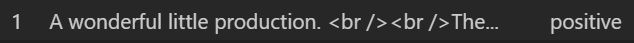<br />
&emsp; 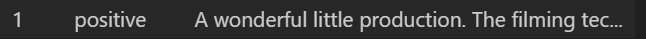<br />

&emsp; **3- Tokenisation**<br />
&emsp; Découpage du texte en mots (ou tokens).

&emsp; **4- Suppression des stopwords**<br />
&emsp; Les mots très fréquents comme the, is, and n’apportent souvent pas de valeur.<br />
&emsp; ➡️ Utilisation des listes de nltk.corpus.stopwords.<br />

&emsp; **5. Lemmatisation (ou stemming)**<br />
&emsp; Réduction des mots à leur forme de base (ex : running → run).<br />



#####

#### **3- Importation de l'Environnement et des Données**<br />
&emsp;3.1 Téléchargement des librairies manquantes <br />

In [15]:
# Installation des bibliothèques nécessaires
!pip install peft
!pip install evaluate
!pip install tf-keras
!pip install hf_xet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.2 Importation des librairies**<br />

&emsp;Importation des bibliothèques nécessaires pour le traitement des données et l'entraînement du modèle.


In [16]:
# Importation des bibliothèques essentielles pour le traitement des données et le machine learning
import numpy as np
import torch
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Bibliothèque pour l'évaluation des modèles
import evaluate

**3.3 Importation des données**

In [17]:
# Chemin le fichier
file_path = r"C:\Users\HP\Downloads\movie\IMDB Dataset.csv"
# Charger les données depuis le fichier CSV
df = pd.read_csv(file_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
# Conversion des étiquettes en format numérique
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df = df.drop(['sentiment'], axis=1) 
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
# Séparer les données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
# Sélectionner un sous-ensemble aléatoire de N échantillons pour l'entraînement et le test
N = 1000
train_subset = train_df.sample(n=N, random_state=42)
test_subset = test_df.sample(n=N, random_state=42)

In [21]:
# Créer les datasets Hugging Face
train_dataset = Dataset.from_pandas(train_subset)
test_dataset = Dataset.from_pandas(test_subset)

In [22]:
train_dataset, test_dataset

(Dataset({
     features: ['review', 'label', '__index_level_0__'],
     num_rows: 1000
 }),
 Dataset({
     features: ['review', 'label', '__index_level_0__'],
     num_rows: 1000
 }))

#####

#### **4. Modèle Classique (TF-IDF + Naive Bayes)**<br />

&emsp;**4.1  Vectorisation des textes avec TF-IDF et Entraînement du modèle Naive Bayes**<br />

&emsp;**4.1.1 Naive Bayes**

&emsp; Le **Naive Bayes** est un modèle probabiliste basé sur le **théorème de Bayes**, utilisé pour <br />
&emsp; la classification. Il suppose que chaque mot d’un texte contribue indépendamment au sentiment <br />
&emsp; global du document. <br />

&emsp; **Principe**<br />
&emsp; Pour une critique donnée 𝑥, le modèle calcule la probabilité que cette critique appartienne <br />
&emsp; à une classe y∈{positif,négatif} <br />

&emsp;**4.2  Évaluation : précision, rappel, F1-score, matrice de confusion**<br />

Résultats du modèle classique (TF-IDF + Naive Bayes) :
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       514
    positive       0.81      0.80      0.81       486

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

Accuracy : 81.40%


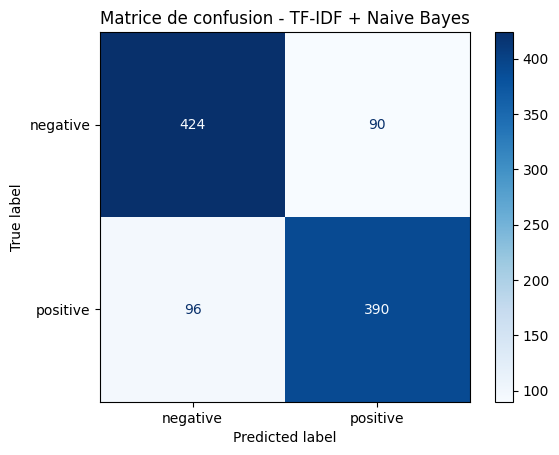

In [23]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Construction du pipeline TF-IDF + Naive Bayes
model_clf = make_pipeline(
    TfidfVectorizer(max_features=5000, stop_words="english"),
    MultinomialNB()
)

# Entraînement du modèle
model_clf.fit(train_dataset["review"], train_dataset["label"])

# Prédictions sur le jeu de test
y_pred = model_clf.predict(test_dataset["review"])

# Évaluation des performances
print("Résultats du modèle classique (TF-IDF + Naive Bayes) :")
print(classification_report(test_dataset["label"], y_pred, target_names=["negative", "positive"]))

# Accuracy globale
acc = accuracy_score(test_dataset["label"], y_pred)
print(f"Accuracy : {acc*100:.2f}%")

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(
    test_dataset["label"],
    y_pred,
    display_labels=["negative", "positive"],
    cmap="Blues"
)
plt.title("Matrice de confusion - TF-IDF + Naive Bayes")
plt.show()

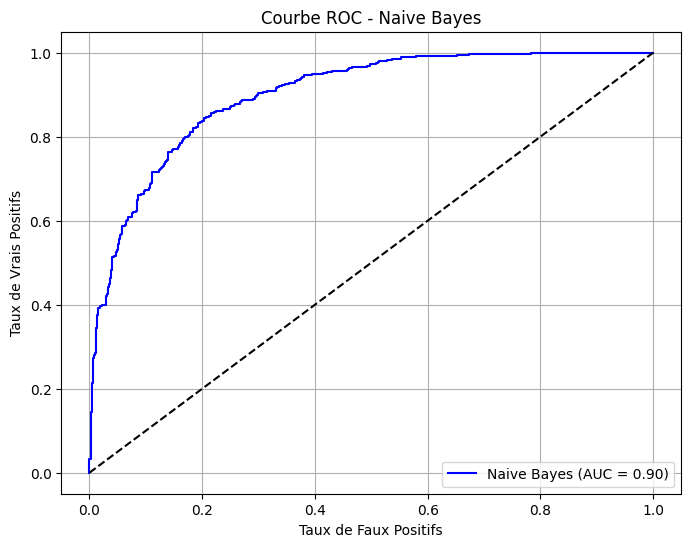

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prédiction des probabilités
# y_probs_nb = model_clf.predict_proba(test_dataset)[:, 1]

X_test = [x["review"] for x in test_dataset]

# Transformer les textes avec le modèle pipeline
y_probs_nb = model_clf.predict_proba(X_test)[:, 1]


# Ensuite, utilisez les vraies étiquettes pour le calcul de la courbe ROC
y_true = [x["label"] for x in test_dataset]  # à adapter si ce sont les vraies labels
fpr_nb, tpr_nb, _ = roc_curve(y_true, y_probs_nb)
auc_nb = roc_auc_score(y_true, y_probs_nb)

# Tracé de la courbe ROC
plt.figure(figsize=(4, 3))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='blue')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### &emsp;**4.3 Démo de prédictions**(Modèle TF-IDF + Naive Bayes)

In [25]:
print("\n Démo : Prédictions sur des phrases d'exemple")

Demo_phrases = [
                "This movie was a masterpiece.",
                "I was blown away by the acting.",
                "It's a classic that everyone should watch.",
                "The plot was confusing and hard to follow.",
                "The special effects were top-notch.",
                "I couldn't stop laughing throughout the movie.",
                "The soundtrack was incredible.",
                "It's a total waste of time.",
                "I'm still thinking about that ending.",
                "I wouldn't recommend it to anyone."]

print("\n Modèle TF-IDF + Naive Bayes")
print("-------------------------------------")
for text in Demo_phrases:
    pred = model_clf.predict([text])[0]
    label = "positive" if pred == 1 else "negative"
    print(f"'{text}' => {label}")


 Démo : Prédictions sur des phrases d'exemple

 Modèle TF-IDF + Naive Bayes
-------------------------------------
'This movie was a masterpiece.' => positive
'I was blown away by the acting.' => positive
'It's a classic that everyone should watch.' => positive
'The plot was confusing and hard to follow.' => negative
'The special effects were top-notch.' => negative
'I couldn't stop laughing throughout the movie.' => negative
'The soundtrack was incredible.' => positive
'It's a total waste of time.' => negative
'I'm still thinking about that ending.' => negative
'I wouldn't recommend it to anyone.' => positive


&emsp; **4.4 Forces/faiblesses de cette approche**

- **Forces**<br />
&emsp; - Simplicité et rapidité<br />
&emsp; - Faible consommation de ressources<br />
&emsp; - Interprétabilité: Facile de comprendre pourquoi un mot contribue à <br />
&emsp;   une prédiction (via les poids TF-IDF ou les probabilités conditionnelles) <br />
&emsp; - Bonnes performances sur les données équilibrées et propres :<br />
&emsp;   Pour des tâches simples comme la classification binaire sur des critiques bien <br />
&emsp;   nettoyées, les résultats sont souvent très corrects.<br />

- **Faiblesses**<br />
&emsp; - *Ignorance du contexte* : Le modèle ne comprend pas la structure grammaticale ni le sens<br />
&emsp; global des phrases. Par exemple, il ne fait pas la différence entre "not good" et "good"<br />
&emsp; si "not" est ignoré ou mal pondéré.<br />
&emsp; - *Pas de prise en compte de l’ordre des mots* : Les modèles TF-IDF se basent sur la fréquence<br />
&emsp; des mots, sans tenir compte de leur position dans la phrase.<br />
&emsp; - *Performances limitées sur des textes ambigus ou ironiques* :<br />
&emsp; Les subtilités du langage (sarcasme, humour, double sens) sont perdues.<br />

##

#### **5. Finetuning complet: Modèle DistilBERT**<br />
##### &emsp;5.1 Présentation de DistilBERT

&emsp;**DistilBERT** est un modèle de langage développé par la société Hugging Face. <br />
&emsp;Il s’agit d’une version allégée et plus rapide de BERT (Bidirectional Encoder <br />
&emsp;Representations from Transformers), tout en conservant des performances proches <br />
&emsp;de l’original.<br />

&emsp; **Objectif**<br />
&emsp;DistilBERT a été conçu pour réduire les coûts de calcul liés à l’utilisation de BERT, <br />
&emsp;sans sacrifier significativement la qualité des prédictions.<br />

&emsp; **Caracteristique** <br />
&emsp; - reduction du nombre de paramètre(Bert: 100 parametres alors que Distibert: 66 parametres) <br />

&emsp;DistilBERT est entraîné à l’aide d’une technique appelée **distillation de connaissances**, <br />
&emsp;où un grand modèle (le professeur, ici BERT) transmet son savoir à un plus petit modèle <br />
&emsp;(le student, ici DistilBERT).<br />


##### &emsp; 5.2 Référence de la technique </br>
&emsp;Ce notebook implémente le fine-tuning du **Modèle DistilBERT**,</br>
&emsp;une version compressée de BERT (Sanh et al., 2019). Ce modèle est 40% plus léger et 60% plus,</br>
&emsp;rapide tout en conservant 97% des performances de BERT, ce qui en fait une alternative idéale</br>
&emsp;pour des déploiements légers en NLP.

- **Article** : DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter</br>
- **Source** : [arXiv:1910.01108](https://arxiv.org/abs/1910.01108)

In [26]:
import torch
# Importe PyTorch, une bibliothèque pour les réseaux de neurones profonds et l'apprentissage automatique.

from datasets import Dataset, DatasetDict
# Importe 'Dataset' et 'DatasetDict' de la bibliothèque 'datasets' de Hugging Face, utilisés pour gérer et préparer des ensembles de données pour l'entraînement de modèles.

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer
# Importe plusieurs classes de la bibliothèque 'transformers' de Hugging Face:
# - DistilBertTokenizer : pour convertir du texte en tokens compréhensibles par DistilBERT.
# - DistilBertForSequenceClassification : une version de DistilBERT préparée pour la classification de séquences (par exemple, classification de texte).
# - TrainingArguments : pour configurer les paramètres d'entraînement.
# - Trainer : pour orchestrer le processus d'entraînement du modèle.

import torch.optim as optim
# Importe le sous-module 'optim' de PyTorch, qui contient divers algorithmes d'optimisation utilisés pour mettre à jour les poids du réseau pendant l'entraînement, tels que SGD, Adam, etc.

&emsp; 5.3 Entraînement et réglage des hyperparamètres

In [27]:
# Paramètres d'entraînement
model_checkpoint = "distilbert-base-uncased"  # Modèle distilbert pré-entraîné
lr = 2e-5  # Taux d'apprentissage
batch_size = 8  # Taille du lot
num_epochs = 3  # Nombre d'époques

Dans le domaine du traitement du langage naturel (NLP), le "padding" joue un rôle crucial dans la préparation des données pour l'entraînement de modèles. Voici quelques détails clés :

Concept de Padding en NLP
Uniformité des Longueurs de Séquences : Les modèles de NLP, en particulier ceux basés sur des réseaux de neurones, nécessitent que toutes les entrées (phrases, paragraphes, etc.) dans un lot de données (batch) aient la même longueur pour un traitement efficace. Cependant, dans la réalité, les séquences de mots varient en longueur.
Ajout de Valeurs de Remplissage : Pour résoudre ce problème, le padding est utilisé pour "remplir" les séquences plus courtes avec des valeurs neutres (souvent des zéros ou un token spécifique) pour qu'elles correspondent à la longueur de la séquence la plus longue dans le lot.

In [28]:
# Charger le tokenizer et le modèle pré-entraîné
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_dataset['review'], truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_dataset['review'], truncation=True, padding=True, return_tensors='pt')

In [29]:
# Étape 2 : Création des datasets PyTorch
# Étape 2 : Création des datasets PyTorch
train_datasetb = Dataset.from_dict({
    # 'input_ids' : Contient les identifiants de tokens obtenus après le processus de tokenisation du texte. 
    # Ces identifiants sont nécessaires pour que le modèle comprenne et traite le texte.
    'input_ids': train_encodings['input_ids'],

    # 'attention_mask' : Un masque d'attention qui indique au modèle quels tokens dans 'input_ids' sont significatifs 
    # (c'est-à-dire non-padding) et doivent être pris en compte lors du traitement.
    'attention_mask': train_encodings['attention_mask'],

    # 'labels' : Les étiquettes associées à chaque exemple d'entraînement. Ces étiquettes sont utilisées pour l'apprentissage supervisé,
    # où le modèle apprend à associer les entrées à ces étiquettes correctes.
    # 'torch.tensor()' est utilisé pour convertir la liste des étiquettes en tensor PyTorch, 
    # ce qui est nécessaire pour le traitement avec PyTorch.
    'labels': torch.tensor(train_dataset['label'])
})

test_datasetb = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': torch.tensor(test_dataset['label'])
})

# Création d'un DatasetDict
datasetb = DatasetDict({
    'train': train_datasetb,
    'test': test_datasetb
})

In [30]:
# Création d'un modèle de classification de séquences basé sur DistilBERT
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
# Affichage du nombre de paramètres du modèle
num_params = sum(p.numel() for p in model.parameters())
print(f"Nombre de paramètres du modèle : {num_params}")
# Afficher l'architecture du modèle BERT
print(model)

Nombre de paramètres du modèle : 66955010
DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
           

In [32]:
# Étape 4 : Définition des paramètres d'entraînement
# Configuration de l'optimiseur pour l'entraînement du modèle
optimizer = optim.AdamW(model.parameters(), lr=lr)
# Définition de la fonction de perte pour l'entraînement du modèle
loss_fn = torch.nn.CrossEntropyLoss()

##### &emsp; 5.3 Évaluation : précision, rappel, F1-score, matrice de confusion

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [34]:
# Définir la correspondance entre les identifiants de classe et les étiquettes
id2label = {0: "Négatif", 1: "Positif"}
label2id = {"Négatif": 0, "Positif": 1}

In [35]:

liste_texte = [
    "This movie was a masterpiece.",
    "I was blown away by the acting.",
    "It's a classic that everyone should watch.",
    "The plot was confusing and hard to follow.",
    "The special effects were top-notch.",
    "I couldn't stop laughing throughout the movie.",
    "The soundtrack was incredible.",
    "It's a total waste of time.",
    "I'm still thinking about that ending.",
    "I wouldn't recommend it to anyone."
]

print("Prédictions du modèle non entraîné:")
print("-------------------------------------")
for texte in liste_texte:
    # Tokenizer le texte
    inputs = tokenizer.encode(texte, return_tensors="pt")
    # Calculer les logits
    logits = model(inputs).logits
    # Convertir les logits en étiquette
    predictions = torch.argmax(logits)

    print(texte + " - " + id2label[predictions.tolist()])

Prédictions du modèle non entraîné:
-------------------------------------
This movie was a masterpiece. - Négatif
I was blown away by the acting. - Négatif
It's a classic that everyone should watch. - Négatif
The plot was confusing and hard to follow. - Négatif
The special effects were top-notch. - Négatif
I couldn't stop laughing throughout the movie. - Négatif
The soundtrack was incredible. - Négatif
It's a total waste of time. - Négatif
I'm still thinking about that ending. - Positif
I wouldn't recommend it to anyone. - Négatif


######

In [36]:
# Définition des arguments d'entraînement avec Transformers
training_args = TrainingArguments(
    output_dir=model_checkpoint + "-fullfinetuned-text-classification",  # Le répertoire où les résultats de l'entraînement seront sauvegardés
    learning_rate=lr,  # Taux d'apprentissage pour l'optimisation du modèle
    per_device_train_batch_size=batch_size,  # Taille du lot d'entraînement par périphérique (GPU ou CPU)
    per_device_eval_batch_size=batch_size,  # Taille du lot d'évaluation par périphérique (GPU ou CPU)
    num_train_epochs=num_epochs,  # Nombre d'époques d'entraînement (combien de fois le modèle parcourt l'ensemble de données)
    weight_decay=0.01,  # Terme de régularisation pour contrôler le poids de la pénalisation dans la fonction de perte
    evaluation_strategy="epoch",  # Stratégie d'évaluation, ici "epoch" signifie évaluer à la fin de chaque époque
    save_strategy="epoch",  # Stratégie de sauvegarde du modèle, ici "epoch" signifie sauvegarder le modèle à la fin de chaque époque
    load_best_model_at_end=True  # Charger le meilleur modèle à la fin de l'entraînement
)

c:\Users\HP\Documents\Projet 8\P8_Dashboard\env_dashboard\Lib\site-packages\transformers\training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [37]:
# Entraînement du modèle avec Trainer de Transformers
trainerfull = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasetb['train'],
    eval_dataset=datasetb['test'],
    compute_metrics=compute_metrics  # Utiliser la fonction de calcul des métriques
)

In [38]:
# Entraînement du modèle
trainerfull.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.302917,0.889000,0.888886,0.889558,0.889000
2,No log,0.422887,0.875000,0.874460,0.878913,0.875000
3,No log,0.385511,0.896000,0.896010,0.897053,0.896000


TrainOutput(global_step=375, training_loss=0.2620825602213542, metrics={'train_runtime': 7579.2776, 'train_samples_per_second': 0.396, 'train_steps_per_second': 0.049, 'total_flos': 397402195968000.0, 'train_loss': 0.2620825602213542, 'epoch': 3.0})

In [39]:
# Sauvegarde du modèle
trainerfull.save_model("trainer_full")

In [40]:
import torch

# Choisir le bon device automatiquement
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


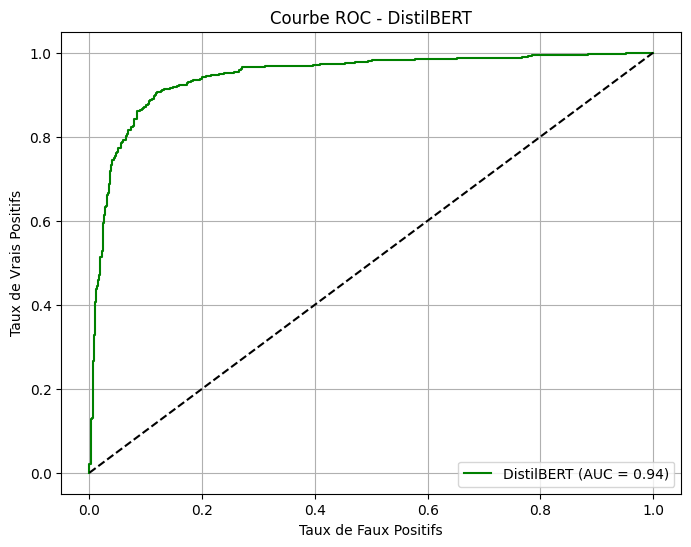

In [41]:

from sklearn.metrics import roc_curve, roc_auc_score

# Prédictions du modèle fine-tuné
predictions = trainerfull.predict(test_datasetb)
y_probs_bert = predictions.predictions[:, 1]
y_true_bert = predictions.label_ids

# Calcul ROC et AUC
fpr_bert, tpr_bert, _ = roc_curve(y_true_bert, y_probs_bert)
auc_bert = roc_auc_score(y_true_bert, y_probs_bert)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_bert, tpr_bert, label=f"DistilBERT (AUC = {auc_bert:.2f})", color='green')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - DistilBERT")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##### **5.4 Demo: Prédictions du modèle entraîné(distilbert)** 

In [42]:
# Afficher les prédictions du modèle entraîné
print("Prédictions du modèle entraîné distilbert:")
print("---------------------------------")

# Parcourir la liste des textes à prédire
for texte in liste_texte:
    # Tokenizer le texte et l'envoyer sur le même device que le modèle
    inputs = tokenizer.encode(texte, return_tensors="pt").to(device)
    # Obtenir les logits du modèle pour le texte
    logits = model(inputs).logits
    # Prédire la classe en choisissant l'indice du logit le plus élevé
    predictions = torch.max(logits, 1).indices
    # Afficher le texte et l'étiquette prédite
    print(texte + " - " + id2label[predictions.tolist()[0]])


Prédictions du modèle entraîné distilbert:
---------------------------------
This movie was a masterpiece. - Positif
I was blown away by the acting. - Négatif
It's a classic that everyone should watch. - Positif
The plot was confusing and hard to follow. - Négatif
The special effects were top-notch. - Positif
I couldn't stop laughing throughout the movie. - Négatif
The soundtrack was incredible. - Positif
It's a total waste of time. - Négatif
I'm still thinking about that ending. - Négatif
I wouldn't recommend it to anyone. - Négatif


#####

### **6. Comparaison visuelle des performances : Baseline vs DistilBERT**

&emsp; **6.1 Résultats  de  l'évaluation des metrics**<br />

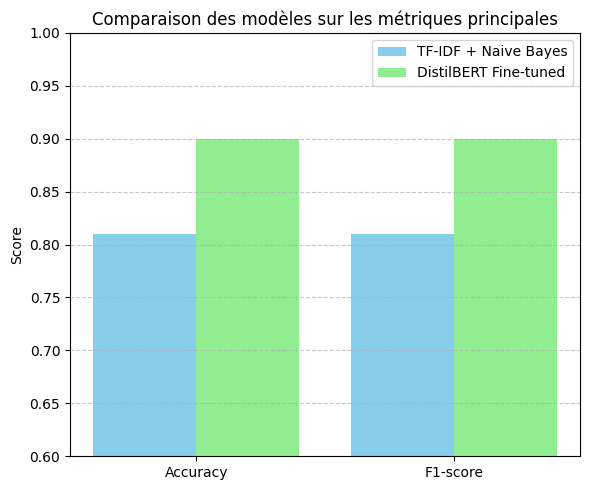

In [43]:
# Résultats à partir des évaluations précédentes
baseline_metrics = {"Accuracy": 0.81, "F1-score": 0.81}
distilbert_metrics = {"Accuracy": 0.90, "F1-score": 0.90}

import matplotlib.pyplot as plt

labels = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
distilbert_values = list(distilbert_metrics.values())

x = range(len(labels))

plt.figure(figsize=(6, 5))
plt.bar([i - 0.2 for i in x], baseline_values, width=0.4, label='TF-IDF + Naive Bayes', color='skyblue')
plt.bar([i + 0.2 for i in x], distilbert_values, width=0.4, label='DistilBERT Fine-tuned', color='lightgreen')
plt.xticks(ticks=x, labels=labels)
plt.ylim(0.6, 1.0)
plt.title("Comparaison des modèles sur les métriques principales")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#####

### **7. Fine-tuning LoRA**

#### **Référence de la technique : LoRA Fine-Tuning**

- **Référence de la technique**
Ce notebook implémente également le fine-tuning avec LoRA (Low-Rank Adaptation), une technique</br> 
récente et efficace de fine-tuning léger pour les modèles de langage de grande taille.</br>

LoRA fige les poids du modèle pré-entraîné et introduit des adaptateurs de faible rang 
(low-rank matrices) pour ajuster le comportement du modèle sans le réentraîner entièrement. Cela permet :</br>

Une réduction drastique des paramètres à entraîner</br>

Une vitesse d'entraînement accélérée</br>

Une meilleure portabilité vers des environnements à ressources limitées</br>

Article : LoRA: Low-Rank Adaptation of Large Language Models</br>
Auteurs : Edward Hu, Yelong Shen, Phillip Wallis, Zeyuan Allen-Zhu, et al.</br>
- Publication : 2021 </br>
- <a href="https://arxiv.org/abs/2106.09685">arxiv_LoRa</a>

In [44]:
# Importation des outils spécifiques aux modèles transformers
from transformers import (
    AutoTokenizer,  # Pour le tokenizing des textes
    AutoModelForSequenceClassification,  # Pour charger un modèle pré-entraîné pour la classification de séquences
    TrainingArguments,  # Pour définir les paramètres d'entraînement
    Trainer,  # Pour entraîner le modèle
    DataCollatorWithPadding  # Pour gérer le padding des séquences lors de l'entraînement
)
# Importation des bibliothèques pour le fine-tuning avec PEFT (Parameter-Efficient Fine-tuning)
from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig

In [45]:
# Définir le modèle que vous souhaitez utiliser pour la classification de séquences. Vous pouvez choisir un modèle pré-entraîné, comme 'distilbert-base-uncased' ou 'roberta-base'.
model_checkpoint = 'distilbert-base-uncased'
# Générer un modèle de classification à partir du modèle pré-entraîné
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=2, id2label=id2label, label2id=label2id)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
# display architecture
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## Preprocessing

In [47]:
# Créer un tokenizer pour le modèle
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)
tokenizer.pad_token
# Ajouter un jeton de padding s'il n'existe pas
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

In [48]:
# Créer une fonction pour tokenizer les données
def tokenize_function(examples):
    text = examples["review"]
    tokenizer.truncation_side = "left"
    tokenized_inputs = tokenizer(
        text,
        padding=True,  # Ajout du padding directement ici
        truncation=True,
        max_length=512
    )
    return tokenized_inputs

In [49]:
# Tokenizer les ensembles d'entraînement et de test
# Créer un DatasetDict
# Tokenizer les ensembles d'entraînement et de test et créer un DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

tokenized_dataset = dataset.map(tokenize_function, batched=True)

tokenized_dataset

Map: 100%|██████████| 1000/1000 [00:00<00:00, 3170.93 examples/s]


DatasetDict({
    train: Dataset({
        features: ['review', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['review', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

In [50]:
# Créer un DataCollator pour gérer le padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#### Evaluation du modèle

In [51]:
# Configuration du modèle LoRA (Low-Rank Adaptation) pour le fine-tuning

# Type de tâche, ici "SEQ_CLS" signifie classification de séquences
peft_config = LoraConfig(
    task_type="SEQ_CLS",  # Type de tâche du modèle
    # Facteur de régularisation "r" pour LoRA
    r=4,
    # Paramètre d'alpha pour LoRA, contrôlant l'importance de la régularisation LoRA
    lora_alpha=32,
    # Taux de dropout pour LoRA, qui détermine la probabilité de désactivation aléatoire des connexions
    lora_dropout=0.01,
    # Modules cibles pour l'application de la régularisation LoRA, ici uniquement le module 'q_lin' est ciblé
    target_modules=['q_lin']
)

In [52]:
peft_config

LoraConfig(task_type='SEQ_CLS', peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path=None, revision=None, inference_mode=False, r=4, target_modules={'q_lin'}, exclude_modules=None, lora_alpha=32, lora_dropout=0.01, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False)

In [53]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 628,994 || all params: 67,584,004 || trainable%: 0.9307


In [54]:
# Hyperparamètres
# Taux d'apprentissage (learning rate) - C'est la vitesse à laquelle le modèle apprend
lr = 1e-3
# Taille du lot (batch size) - Le nombre d'exemples de données utilisés pour chaque mise à jour de poids du modèle
batch_size = 4
# Nombre d'époques (epochs) - Le nombre de fois que le modèle parcourt l'ensemble de données complet lors de l'entraînement
num_epochs = 3

In [55]:
# Définition des arguments d'entraînement

# Répertoire de sortie où les résultats de l'entraînement seront sauvegardés
training_args = TrainingArguments(
    output_dir= model_checkpoint + "-lora-text-classification",  # Chemin du répertoire de sortie

    # Taux d'apprentissage (learning rate) pour l'optimisation du modèle
    learning_rate=lr,

    # Taille du lot (batch size) d'entraînement par périphérique (GPU ou CPU)
    per_device_train_batch_size=batch_size,

    # Taille du lot (batch size) d'évaluation par périphérique (GPU ou CPU)
    per_device_eval_batch_size=batch_size,

    # Nombre d'époques d'entraînement (combien de fois le modèle parcourt l'ensemble de données)
    num_train_epochs=num_epochs,

    # Terme de régularisation pour contrôler le poids de la pénalisation dans la fonction de perte
    weight_decay=0.01,

    # Stratégie d'évaluation, ici "epoch" signifie évaluer à la fin de chaque époque
    evaluation_strategy="epoch",

    # Stratégie de sauvegarde du modèle, ici "epoch" signifie sauvegarder le modèle à la fin de chaque époque
    save_strategy="epoch",

    # Charger le meilleur modèle à la fin de l'entraînement
    load_best_model_at_end=True
)

c:\Users\HP\Documents\Projet 8\P8_Dashboard\env_dashboard\Lib\site-packages\transformers\training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
# Création de l'objet "trainer" pour entraîner le modèle

# Le modèle à entraîner
trainer = Trainer(
    model=model,  # Le modèle que vous avez configuré précédemment

    # Les arguments d'entraînement définis précédemment
    args=training_args,

    # L'ensemble de données d'entraînement tokenisé
    train_dataset=tokenized_dataset["train"],

    # L'ensemble de données de validation tokenisé
    eval_dataset=tokenized_dataset["test"],

    # Le tokenizer utilisé pour le prétraitement
    tokenizer=tokenizer,

    # Le "data_collator" qui gère le padding dynamique des exemples dans chaque lot pour qu'ils aient la même longueur
    data_collator=data_collator,

    # La fonction de calcul des métriques pour évaluer le modèle
    compute_metrics=compute_metrics
)

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\2241369498.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [57]:
# Entraînement du modèle
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.522927,0.881000,0.881009,0.881034,0.881000
2,0.327900,0.611644,0.879000,0.878541,0.882361,0.879000
3,0.327900,0.699000,0.874000,0.874024,0.874496,0.874000


TrainOutput(global_step=750, training_loss=0.267607899983724, metrics={'train_runtime': 4745.1971, 'train_samples_per_second': 0.632, 'train_steps_per_second': 0.158, 'total_flos': 403199004672000.0, 'train_loss': 0.267607899983724, 'epoch': 3.0})

### Generate prediction

In [58]:
# Passer le modèle en mode 'mps' (pour Mac, vous pouvez également utiliser 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): DistilBertForSequenceClassification(
      (distilbert): DistilBertModel(
        (embeddings): Embeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (transformer): Transformer(
          (layer): ModuleList(
            (0-5): 6 x TransformerBlock(
              (attention): DistilBertSdpaAttention(
                (dropout): Dropout(p=0.1, inplace=False)
                (q_lin): lora.Linear(
                  (base_layer): Linear(in_features=768, out_features=768, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.01, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=7

### **Demo: Prédictions du modèle Fine-tuning LoRA**

In [59]:
# Afficher les prédictions du modèle entraîné
print("Prédictions du modèle entraîné :")
print("---------------------------------")

# Parcourir la liste des textes à prédire
for texte in liste_texte:
    # Tokenizer le texte
    inputs = tokenizer.encode(texte, return_tensors="pt").to(device) # Passage en mode 'mps' (ou 'cpu' en alternative pour Mac)

    # Obtenir les logits du modèle pour le texte
    logits = model(inputs).logits

    # Prédire la classe en choisissant l'indice du logit le plus élevé
    predictions = torch.max(logits, 1).indices

    # Afficher le texte et l'étiquette prédite
    print(texte + " - " + id2label[predictions.tolist()[0]])


Prédictions du modèle entraîné :
---------------------------------
This movie was a masterpiece. - Positif
I was blown away by the acting. - Négatif
It's a classic that everyone should watch. - Positif
The plot was confusing and hard to follow. - Négatif
The special effects were top-notch. - Positif
I couldn't stop laughing throughout the movie. - Négatif
The soundtrack was incredible. - Positif
It's a total waste of time. - Négatif
I'm still thinking about that ending. - Négatif
I wouldn't recommend it to anyone. - Négatif


#####

### 8. **Comparaison visuelle des performances : Baseline vs DistilBERT vs LoRa**

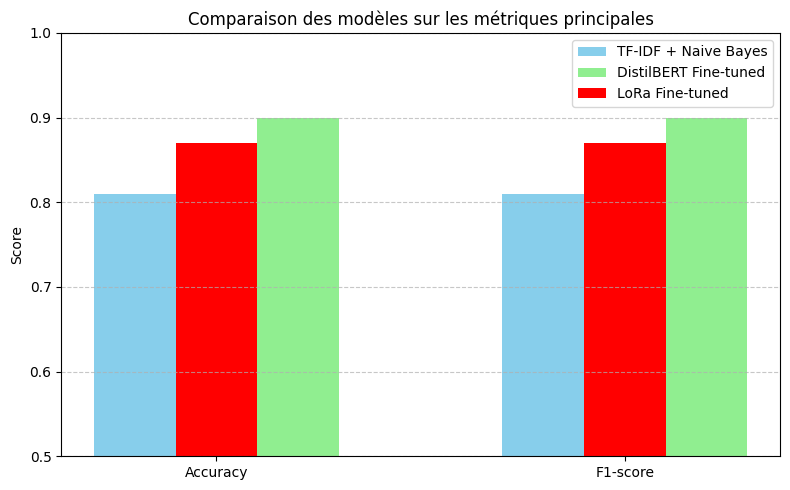

In [60]:
# Résultats à partir des évaluations précédentes
baseline_metrics = {"Accuracy": 0.81, "F1-score": 0.81}
distilbert_metrics = {"Accuracy": 0.90, "F1-score": 0.90}
LoRa_metrics = {"Accuracy": 0.87, "F1-score": 0.87}

import matplotlib.pyplot as plt

labels = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
distilbert_values = list(distilbert_metrics.values())
LoRa_values = list(LoRa_metrics.values())

x = range(len(labels))


plt.figure(figsize=(8, 5))
plt.bar([i - 0.2 for i in x], baseline_values, width=0.2, label='TF-IDF + Naive Bayes', color='skyblue')
plt.bar([i + 0.2 for i in x], distilbert_values, width=0.2, label='DistilBERT Fine-tuned', color='lightgreen')
plt.bar([i + 0 for i in x], LoRa_values, width=0.2, label='LoRa Fine-tuned', color='red')
plt.xticks(ticks=x, labels=labels)
plt.ylim(0.5, 1.0)
plt.title("Comparaison des modèles sur les métriques principales")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##

## **Note méthodologique synthétique**

#### **Note Méthodologique**

**Objectif :** Comparer un modèle NLP moderne (DistilBERT) avec un modèle </br>
classique (TF-IDF + Naive Bayes)pour une tâche d'analyse de sentiment.</br>

#### **Méthodes comparées**
- DistilBERT fine-tuné : Transformer compressé, entraîné via HuggingFace Trainer
- TF-IDF + Naive Bayes : pipeline classique scikit-learn

#### **Résultats comparatifs**

|**Modèles**              | Accuracy | F1-score |
|-------------------------|----------|----------|
| TF-IDF + Naive Bayes    | ~81%     | ~0.81    |
| **DistilBERT Fine-tuné**| **90%**  | **0.90** |

#### **Conclusion**
DistilBERT offre de bien meilleures performances avec peu de ressources,</br>
et est adapté pour une intégration dans des systèmes modernes de NLP.
